In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
df = pd.read_csv("C:/Users/simon/OneDrive/Documents/CUA COURSES/ENGR 441 & 442/Prototype 2/MASTER DATAFRAME/NORMALIZED_MASTER.csv")

In [35]:
df.columns

Index(['Date', 'Generated (kWh)', 'Efficiency', 'System Name', 'Location',
       'System Size (kW)', 'Solar_Irradiance', 'Temperature_2m',
       'Cloud_Cover'],
      dtype='object')

In [37]:
X = df[['Solar_Irradiance', 'Temperature_2m', 'Cloud_Cover', 'System Size (kW)']]
y = df['Generated (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [39]:
param_grid = {'n_estimators': [500, 1000],
              'max_depth': [10, 50]
             }

In [41]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=10, n_estimators=1000)


In [43]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

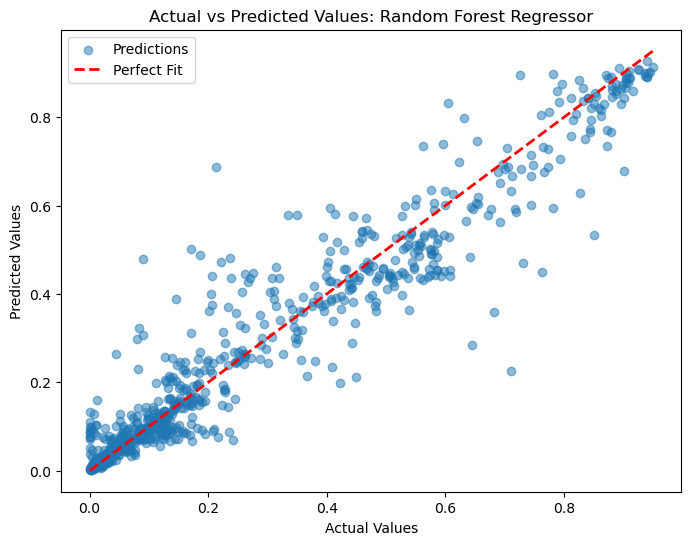

In [45]:
y_predict_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Random Forest Regressor")
plt.legend()
plt.show()

In [47]:
test_r2 = r2_score(y_test, y_predict_rf)
test_mae = mean_absolute_error(y_test, y_predict_rf)
test_mse = mean_squared_error(y_test, y_predict_rf)

print(f"R2 Score: {test_r2:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"MSE: {test_mse:.4f}")

R2 Score: 0.9227
MAE: 0.0460
MSE: 0.0058


In [49]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)
print(f"Cross Validation Scores: {cv_scores}")

Cross Validation Scores: [0.93482384 0.88885304 0.93621013 0.92526559 0.9068099 ]


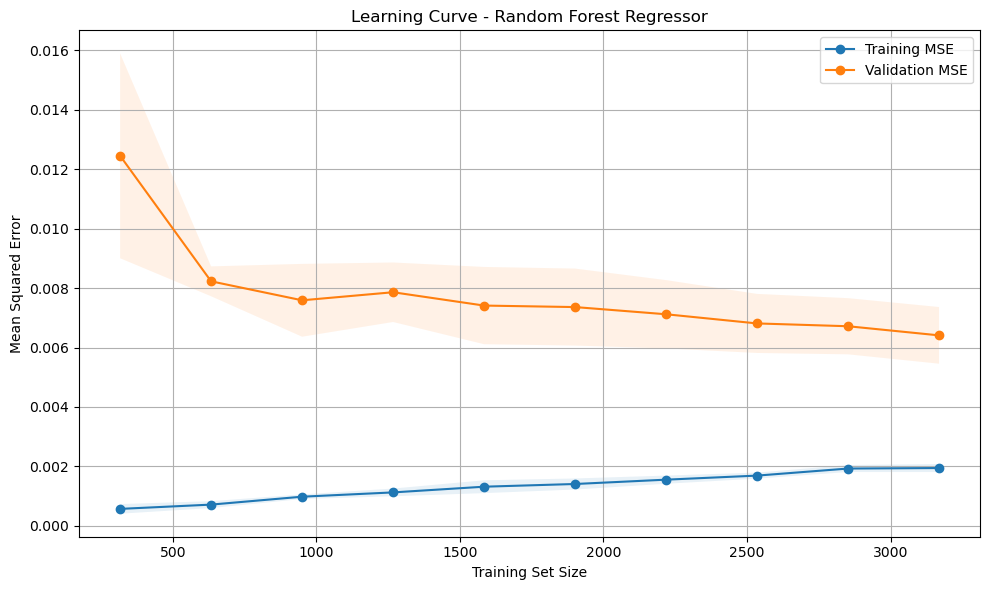

In [51]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X,
    y=y,
    cv=5,
    scoring='neg_mean_squared_error',  
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation MSE')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1)
plt.title("Learning Curve - Random Forest Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:





##TESTING DIFFERENT PARAMETER GRIDS##






In [ ]:



#---------------------------   1   ---------------------------#




In [57]:
param_grid2 = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [10, 30, 50, 70],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', None]
}

rf2 = RandomForestRegressor()

random_search = RandomizedSearchCV(
    estimator=rf2,
    param_distributions=param_grid2,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 1000, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 10}


In [59]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

print(f"Test R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.4f}")

Test R² Score: 0.9240
Test MAE: 0.0460
Test MSE: 0.0057


In [ ]:



#--------------------------------   2   --------------------------------#




In [61]:
grid_search2 = GridSearchCV(RandomForestRegressor(), param_grid=param_grid2, n_jobs=-1)
grid_search2.fit(X_train, y_train)
print(grid_search2.best_estimator_)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500)


In [63]:
rf3 = RandomForestRegressor(n_estimators=500, max_depth=10, max_features='sqrt')
rf3.fit(X_train, y_train)

rf3_pred = rf3.predict(X_test)
print(f"Test R² Score: {r2_score(y_test, rf3_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, rf3_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, rf3_pred):.4f}")

Test R² Score: 0.9242
Test MAE: 0.0459
Test MSE: 0.0057


In [65]:
cv_scores2 = cross_val_score(rf3, X_train, y_train, cv=5, n_jobs=-1)
print(cv_scores2)

[0.93422068 0.89106748 0.93838956 0.92747897 0.9116374 ]


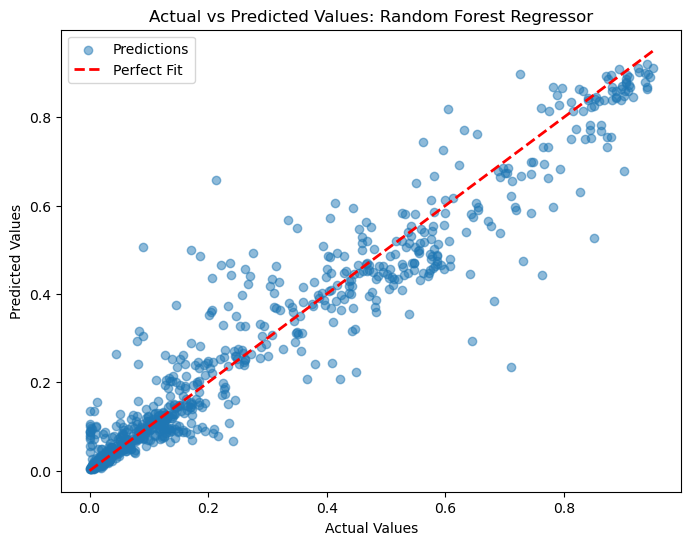

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf3_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Random Forest Regressor")
plt.legend()
plt.show()

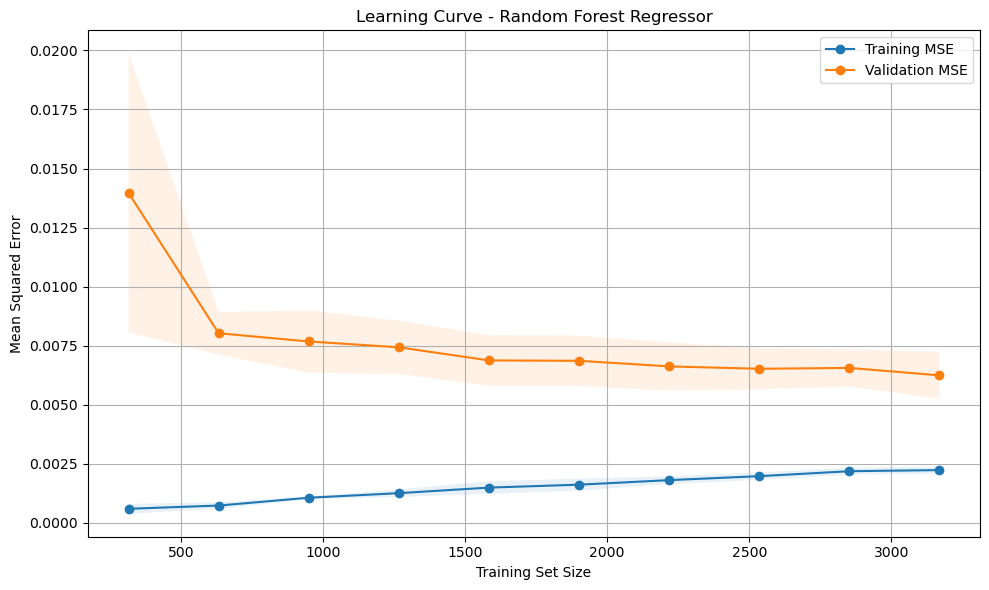

In [71]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf3,
    X=X,
    y=y,
    cv=5,
    scoring='neg_mean_squared_error',  
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation MSE')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1)
plt.title("Learning Curve - Random Forest Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
import joblib
joblib.dump(rf3, 'random_forest_model_normalized_label=generated_hpTuned.pkl')

['random_forest_model_normalized_label=generated_hpTuned.pkl']